In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from data_craw import integration
import matplotlib.pyplot as plt
import statsmodels

%matplotlib inline

plt.style.use('ggplot')

data_file_name='data.csv'

import os
if os.path.isfile(data_file_name):
    print('Load {} from cache'.format(data_file_name))
    df=pd.read_csv(data_file_name)
else:
    print('The cache is not established. Trying to create it from data_craw.py script')
    bl=integration()
    df=pd.DataFrame(bl)
    df.index=df['id']
    df.to_csv(data_file_name)

Load data.csv from cache


In [2]:
df

,id,content,des_len,diff,hit,id.1,solve,t_content
0,1,187,25,5,13792,1,537234,85
1,2,312,32,5,7571,2,438350,135
2,3,111,17,5,6364,3,317208,65
3,4,209,20,5,5414,4,285419,101
4,5,206,24,5,4627,5,297082,70
5,6,431,17,5,4524,6,298805,156
6,7,137,16,5,3756,7,256030,62
7,8,1255,30,5,4263,8,220371,1071
8,9,229,46,5,4090,9,220702,157
9,10,105,19,5,3710,10,202710,65


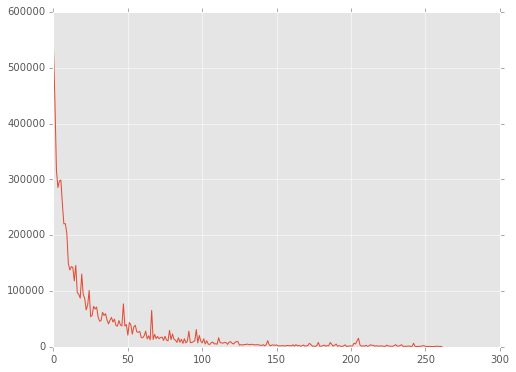

In [3]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df['solve'])

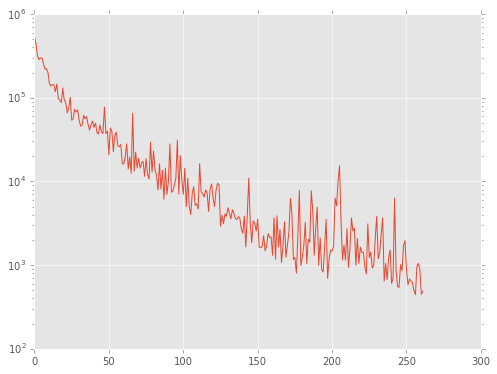

In [4]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df['solve'])
plt.yscale('log')

In [5]:
df['solve'].head()

0    537234
1    438350
2    317208
3    285419
4    297082
Name: solve, dtype: int64

In [6]:
df['solve'].shift(1).head()

0         NaN
1    537234.0
2    438350.0
3    317208.0
4    285419.0
Name: solve, dtype: float64

In [7]:
(df['solve']/df['solve'].shift(1)).head()

0         NaN
1    0.815939
2    0.723641
3    0.899785
4    1.040863
Name: solve, dtype: float64

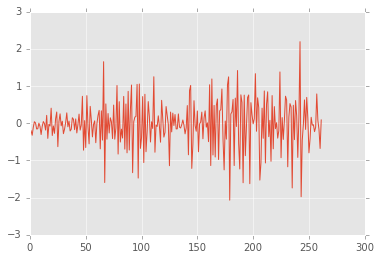

In [8]:
plt.plot(np.log(df['solve']/df['solve'].shift(1)))

In [9]:
ser = np.log(df['solve']/df['solve'].shift(1))[1:]

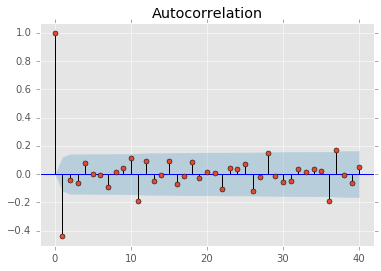

In [10]:
sm.graphics.tsa.plot_acf(ser, lags=40)
plt.show()

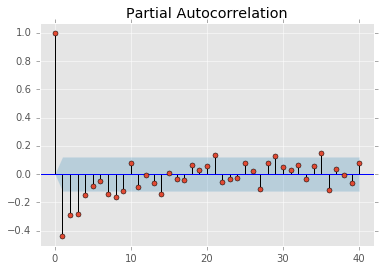

In [11]:
sm.graphics.tsa.plot_pacf(ser, lags=40)
plt.show()

In [12]:
ser.mean()

-0.026834764854078617

In [13]:
ser.std()

0.6418147031250282

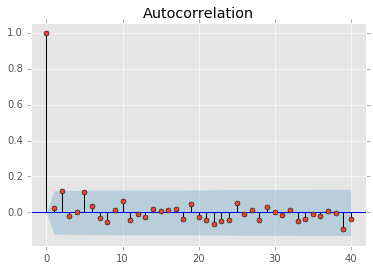

In [14]:
sm.graphics.tsa.plot_acf(df['content'],lags = 40)
plt.show()

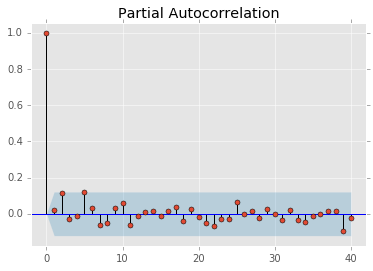

In [15]:
sm.graphics.tsa.plot_pacf(df['content'],lags = 40)
plt.show()

In [16]:
ser2 = ser - ser.mean()

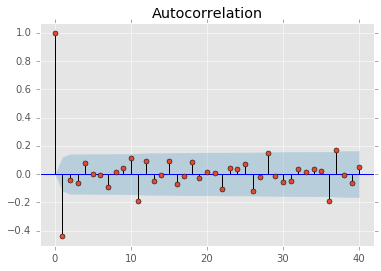

In [17]:
sm.graphics.tsa.plot_acf(ser2, lags=40)
plt.show()

In [18]:
res = smf.ols('solve ~ id + diff',data=df).fit()

In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     63.95
Date:                Tue, 11 Apr 2017   Prob (F-statistic):           2.68e-23
Time:                        22:01:55   Log-Likelihood:                -3224.6
No. Observations:                 262   AIC:                             6455.
Df Residuals:                     259   BIC:                             6466.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.401e+04   6678.292     14.077      0.000      8.09e+04  1.07e+05
id          -479.7585     90.521     -5.300      0.000      -658.008  -301.509
diff         -60.2227    266.704     -0.226      0.822      -585.406   464.961
==============================================================================
Omnibus:                      270.575   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8178.806
Skew:                           4.299   Prob(JB):                         0.00
Kurtosis:                      28.986   Cond. No.                         317.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
def to_latex(summary, width_scale=0.5, col_scale=0.5, 
             print_only=True, center = True):
    header = '\\scalebox{{{}}}[{}]{{'.format(width_scale,col_scale)
    tail = '}'
    latex_list = []
    for table in summary.tables:
        latex = table.as_latex_tabular(center=False).replace('_','\\_')
        latex_list.append('\n'.join([header,latex,tail]))
    latex = '\n'.join(latex_list)
    if center:
        latex = '\n'.join([r'\begin{center}', latex, r'\end{center}'])
    if print_only:
        print(latex)
    else:
        return latex


In [21]:
#to_latex(res.summary())

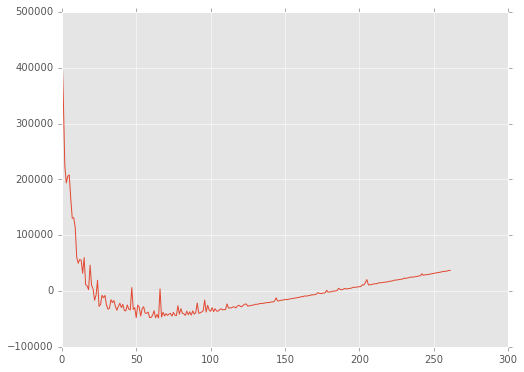

In [22]:
fig,ax = plt.subplots(figsize = (8,6))

plt.plot(res.resid)

In [23]:
from numpy import log

res = smf.ols('log(solve) ~ id + diff',data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(solve)   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2150.
Date:                Tue, 11 Apr 2017   Prob (F-statistic):          4.94e-162
Time:                        22:01:55   Log-Likelihood:                -128.21
No. Observations:                 262   AIC:                             262.4
Df Residuals:                     259   BIC:                             273.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.4369      0.049    232.406      0.000        11.340    11.534
id            -0.0081      0.001    -12.179      0.000        -0.009    -0.007
diff          -0.0407      0.002    -20.685      0.000        -0.045    -0.037
==============================================================================
Omnibus:                      117.312   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.808
Skew:                           1.888   Prob(JB):                    4.30e-102
Kurtosis:                       8.339   Cond. No.                         317.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#to_latex(res.summary())

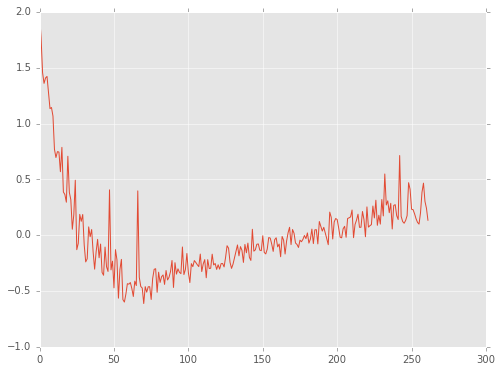

In [25]:
fig,ax = plt.subplots(figsize = (8,6))

plt.plot(res.resid)

In [26]:
df['diff_mid'] = df['diff'] > 25
df['diff_hard'] = df['diff'] > 50
df['diff_S'] = df['diff'] > 70

In [27]:
res = smf.ols('log(solve) ~ id + diff_mid + diff_hard ',data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(solve)   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     841.8
Date:                Tue, 11 Apr 2017   Prob (F-statistic):          6.87e-133
Time:                        22:01:56   Log-Likelihood:                -192.36
No. Observations:                 262   AIC:                             392.7
Df Residuals:                     258   BIC:                             407.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            11.2770      0.066    169.869      0.000        11.146    11.408
diff_mid[T.True]     -1.0259      0.102    -10.088      0.000        -1.226    -0.826
diff_hard[T.True]    -0.6194      0.092     -6.731      0.000        -0.801    -0.438
id                   -0.0124      0.001    -16.695      0.000        -0.014    -0.011
==============================================================================
Omnibus:                       32.712   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.065
Skew:                           0.810   Prob(JB):                     1.64e-10
Kurtosis:                       4.225   Cond. No.                         501.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

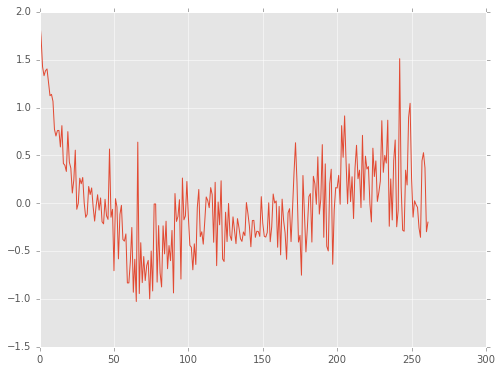

In [28]:
fig,ax = plt.subplots(figsize = (8,6))

plt.plot(res.resid)

In [29]:
#to_latex(res.summary())

In [30]:
res = smf.ols('log(hit) ~ id + diff ',data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log(hit)   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     529.0
Date:                Tue, 11 Apr 2017   Prob (F-statistic):           3.46e-92
Time:                        22:01:58   Log-Likelihood:                -111.77
No. Observations:                 262   AIC:                             229.5
Df Residuals:                     259   BIC:                             240.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.2747      0.046    179.042      0.000         8.184     8.366
id            -0.0111      0.001    -17.705      0.000        -0.012    -0.010
diff           0.0041      0.002      2.207      0.028         0.000     0.008
==============================================================================
Omnibus:                        0.793   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.642
Skew:                           0.118   Prob(JB):                        0.726
Kurtosis:                       3.054   Cond. No.                         317.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

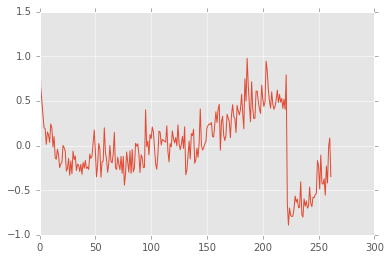

In [31]:
plt.plot(res.resid)

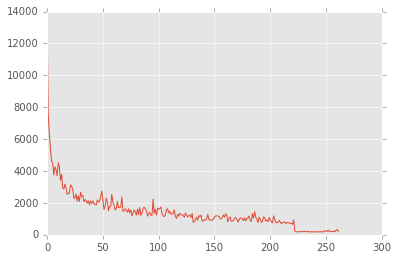

In [32]:
plt.plot(df['hit'])

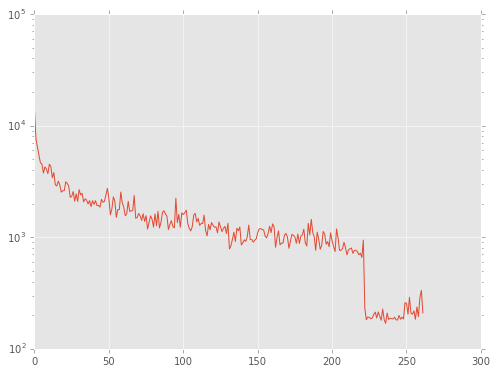

In [33]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df['hit'])
plt.yscale('log')

In [34]:
df['hit'].tail(50)

212    787
213    800
214    717
215    761
216    764
217    742
218    697
219    718
220    660
221    942
222    231
223    182
224    193
225    191
226    186
227    189
228    203
229    213
230    189
231    214
232    196
233    180
234    227
235    183
236    169
237    209
238    183
239    188
240    186
241    185
242    192
243    182
244    181
245    199
246    184
247    192
248    185
249    259
250    256
251    204
252    289
253    209
254    204
255    219
256    184
257    237
258    194
259    287
260    334
261    210
Name: hit, dtype: int64

In [35]:
df['solve'].tail(50)

212    1577
213    3669
214    2555
215    2760
216     992
217    2085
218    1047
219    1636
220    1412
221    1432
222     958
223     783
224    3106
225    1228
226    1428
227     923
228    1002
229    2070
230    3844
231    1191
232    1404
233    2378
234    3677
235     645
236    1045
237     672
238    1236
239    1513
240     603
241     708
242    6335
243     878
244     554
245     541
246    1012
247     856
248    1712
249    1961
250     884
251     582
252     682
253     647
254     621
255     495
256     443
257     973
258    1047
259     882
260     447
261     488
Name: solve, dtype: int64

In [36]:
res = smf.ols('hit ~ solve',data=df.head(200)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hit   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1375.
Date:                Tue, 11 Apr 2017   Prob (F-statistic):           4.85e-91
Time:                        22:02:00   Log-Likelihood:                -1511.6
No. Observations:                 200   AIC:                             3027.
Df Residuals:                     198   BIC:                             3034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1144.9051     36.906     31.022      0.000      1072.126  1217.684
solve          0.0167      0.000     37.076      0.000         0.016     0.018
==============================================================================
Omnibus:                      134.173   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3312.519
Skew:                           2.056   Prob(JB):                         0.00
Kurtosis:                      22.509   Cond. No.                     9.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

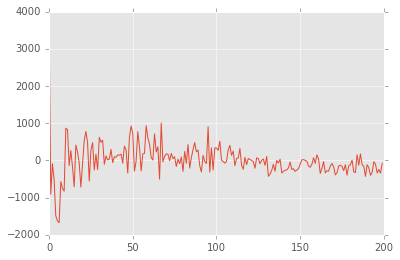

In [37]:
plt.plot(res.resid)

In [38]:
res = smf.ols('hit ~ solve',data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1264.
Date:                Tue, 11 Apr 2017   Prob (F-statistic):          7.84e-102
Time:                        22:02:01   Log-Likelihood:                -2015.4
No. Observations:                 262   AIC:                             4035.
Df Residuals:                     260   BIC:                             4042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    933.3706     35.895     26.003      0.000       862.689  1004.052
solve          0.0179      0.001     35.552      0.000         0.017     0.019
==============================================================================
Omnibus:                       45.741   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.239
Skew:                           0.428   Prob(JB):                     1.92e-67
Kurtosis:                       8.236   Cond. No.                     7.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

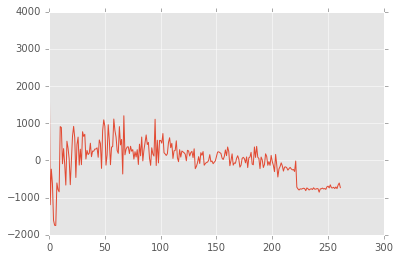

In [39]:
plt.plot(res.resid)

In [40]:
res = smf.ols('log(hit) ~ log(solve)',data=df.head(200)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log(hit)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     787.0
Date:                Tue, 11 Apr 2017   Prob (F-statistic):           6.60e-71
Time:                        22:02:02   Log-Likelihood:                 25.677
No. Observations:                 200   AIC:                            -47.35
Df Residuals:                     198   BIC:                            -40.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.7823      0.092     51.866      0.000         4.600     4.964
log(solve)     0.2744      0.010     28.054      0.000         0.255     0.294
==============================================================================
Omnibus:                       36.380   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.928
Skew:                           0.775   Prob(JB):                     4.02e-21
Kurtosis:                       5.978   Cond. No.                         58.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

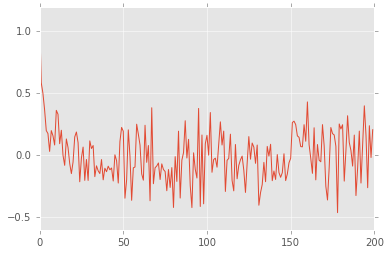

In [41]:
plt.plot(res.resid)

In [46]:
df2 = pd.read_csv(data_file_name)
#print(df2.head().to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  id &  content &  des\_len &  diff &    hit &  id.1 &   solve &  t\_content \\
\midrule
0 &   1 &      187 &       25 &     5 &  13792 &     1 &  537234 &         85 \\
1 &   2 &      312 &       32 &     5 &   7571 &     2 &  438350 &        135 \\
2 &   3 &      111 &       17 &     5 &   6364 &     3 &  317208 &         65 \\
3 &   4 &      209 &       20 &     5 &   5414 &     4 &  285419 &        101 \\
4 &   5 &      206 &       24 &     5 &   4627 &     5 &  297082 &         70 \\
\bottomrule
\end{tabular}



In [50]:
del df2['id.1']

In [52]:
#print(df2.head().to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  id &  content &  des\_len &  diff &    hit &   solve &  t\_content \\
\midrule
0 &   1 &      187 &       25 &     5 &  13792 &  537234 &         85 \\
1 &   2 &      312 &       32 &     5 &   7571 &  438350 &        135 \\
2 &   3 &      111 &       17 &     5 &   6364 &  317208 &         65 \\
3 &   4 &      209 &       20 &     5 &   5414 &  285419 &        101 \\
4 &   5 &      206 &       24 &     5 &   4627 &  297082 &         70 \\
\bottomrule
\end{tabular}

